<a href="https://colab.research.google.com/github/HanaOctavia/Smoke-Detection/blob/main/38_FINAL_ML_Terapan_Projek_1_Perdictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projek ML Terapan 1 : Mendeteksi asap rokok

### Hana Octavia Trinida Malo

###M05

In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, f1_score

# Data Understanding

**1. Data Loading**

In [2]:
dataset = '/content/sample_data/smoke_detection_iot.csv'
sp = pd.read_csv(dataset)
sp

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


**2. Mengecek dan menangani missing value**

In [3]:
sp.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

Data kita tidak memiliki nilai null

In [4]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
# menghapus tabel 'Unnamed: 0' karena tidak memberikan pengaruh apapun 
sp = sp.drop(['Unnamed: 0'], axis = 1)
sp

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [6]:
# melihat kolom apa saja yang ada dan berapa banyak data
print('columns: ', list(sp.columns))
print('shape: ', sp.shape)


columns:  ['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm']
shape:  (62630, 15)


**3. Menangani Outliers**

Mengecek apakah ada outliners

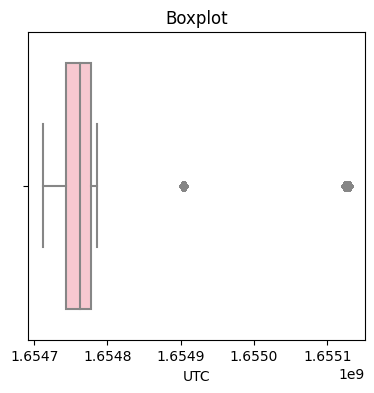

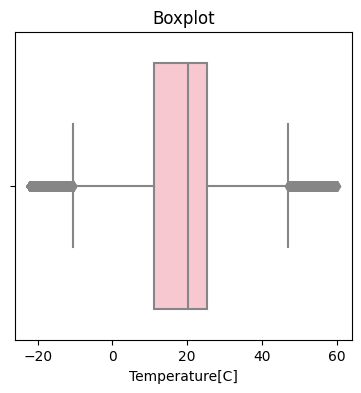

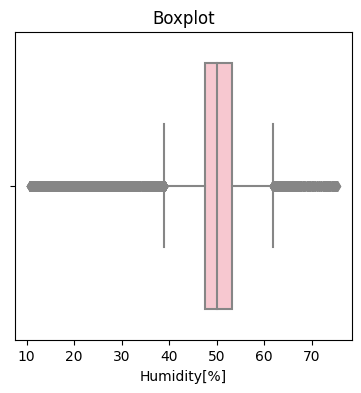

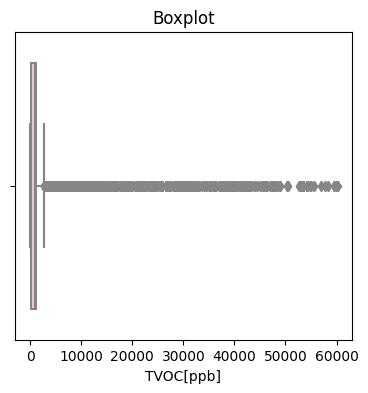

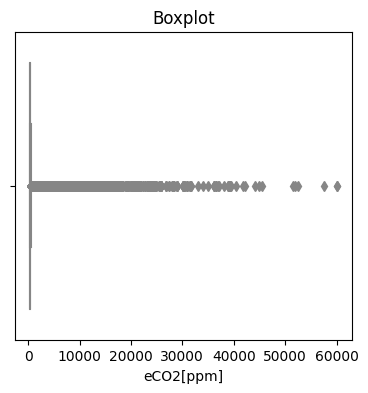

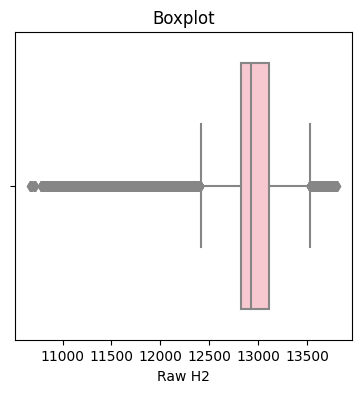

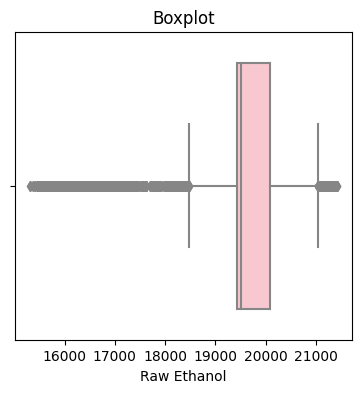

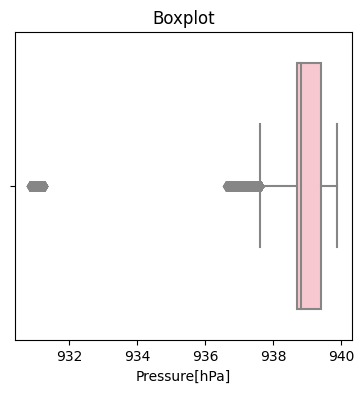

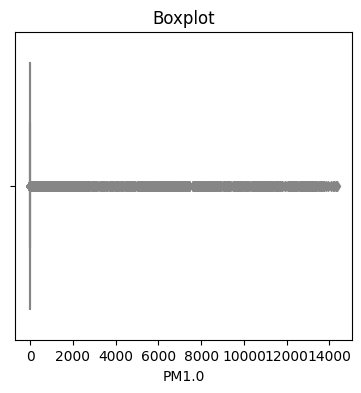

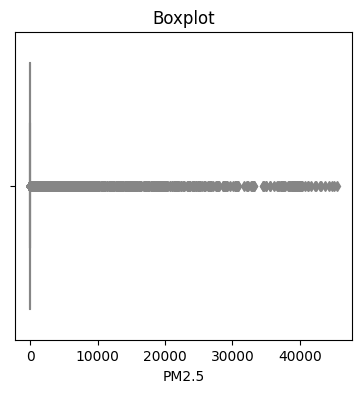

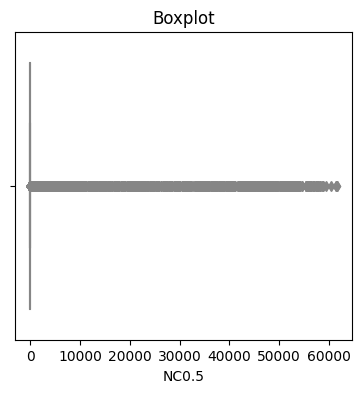

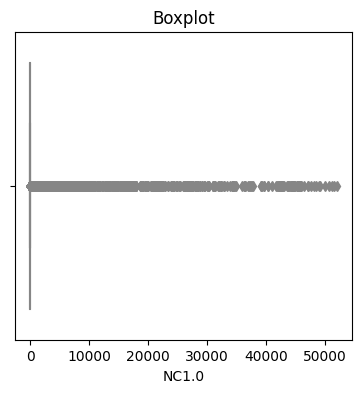

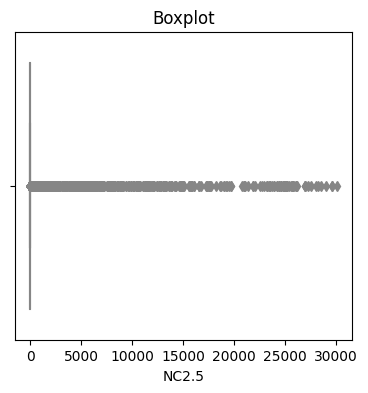

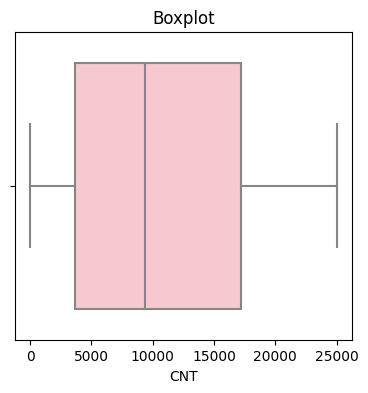

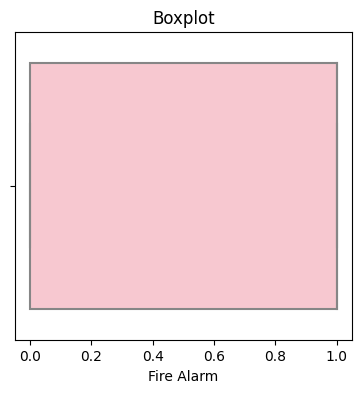

In [7]:
def diagnostic_plots(sp, variable) :
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 4, 3)
    sns.boxplot(x=sp[variable],color = 'pink')
    plt.title('Boxplot')

    plt.show()

for variable in sp:
    diagnostic_plots(sp,variable)

dilihat dari hasil grafik diatas terdapat outliners

sehingga kita dapat menangani outliners dengan cara berikut


In [8]:
Q1 = sp.quantile(0.25)
Q3 = sp.quantile(0.75)
IQR=Q3-Q1
sp=sp[~((sp<(Q1-1.5*IQR))|(sp>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
sp.shape

(35684, 15)

Terlihat bahwa dataset kita hanya hanya memiliki 35684 data

Dataset Anda sekarang telah bersih dan memiliki 35684 sampel.

**4. proses analisis data dengan teknik Univariate EDA.**


Membagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [9]:
numerical_features = ['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT']
categorical_features =  ['Fire Alarm']

Analisis terhadap fitur kategori

   jumlah sampel  persentase
1          30797        86.3
0           4887        13.7


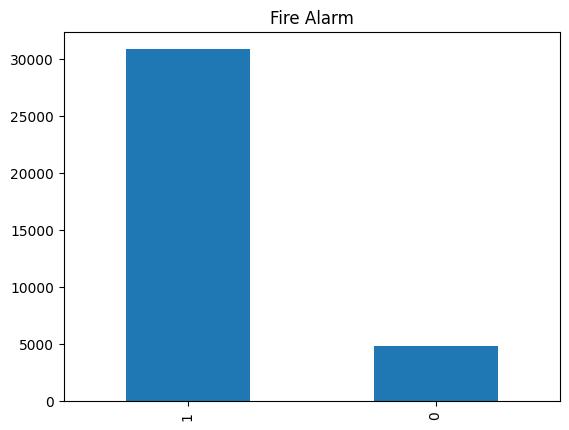

In [10]:
# Fitur Fire Alarm
feature = categorical_features[0]
count = sp[feature].value_counts()
percent = 100*sp[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Karena ada imbalance pada kolom target 'fire alarm' maka dilakukan Under sampling agar mengurangi bias

c. Numerical Features

melihat histogram masing-masing fiturnya

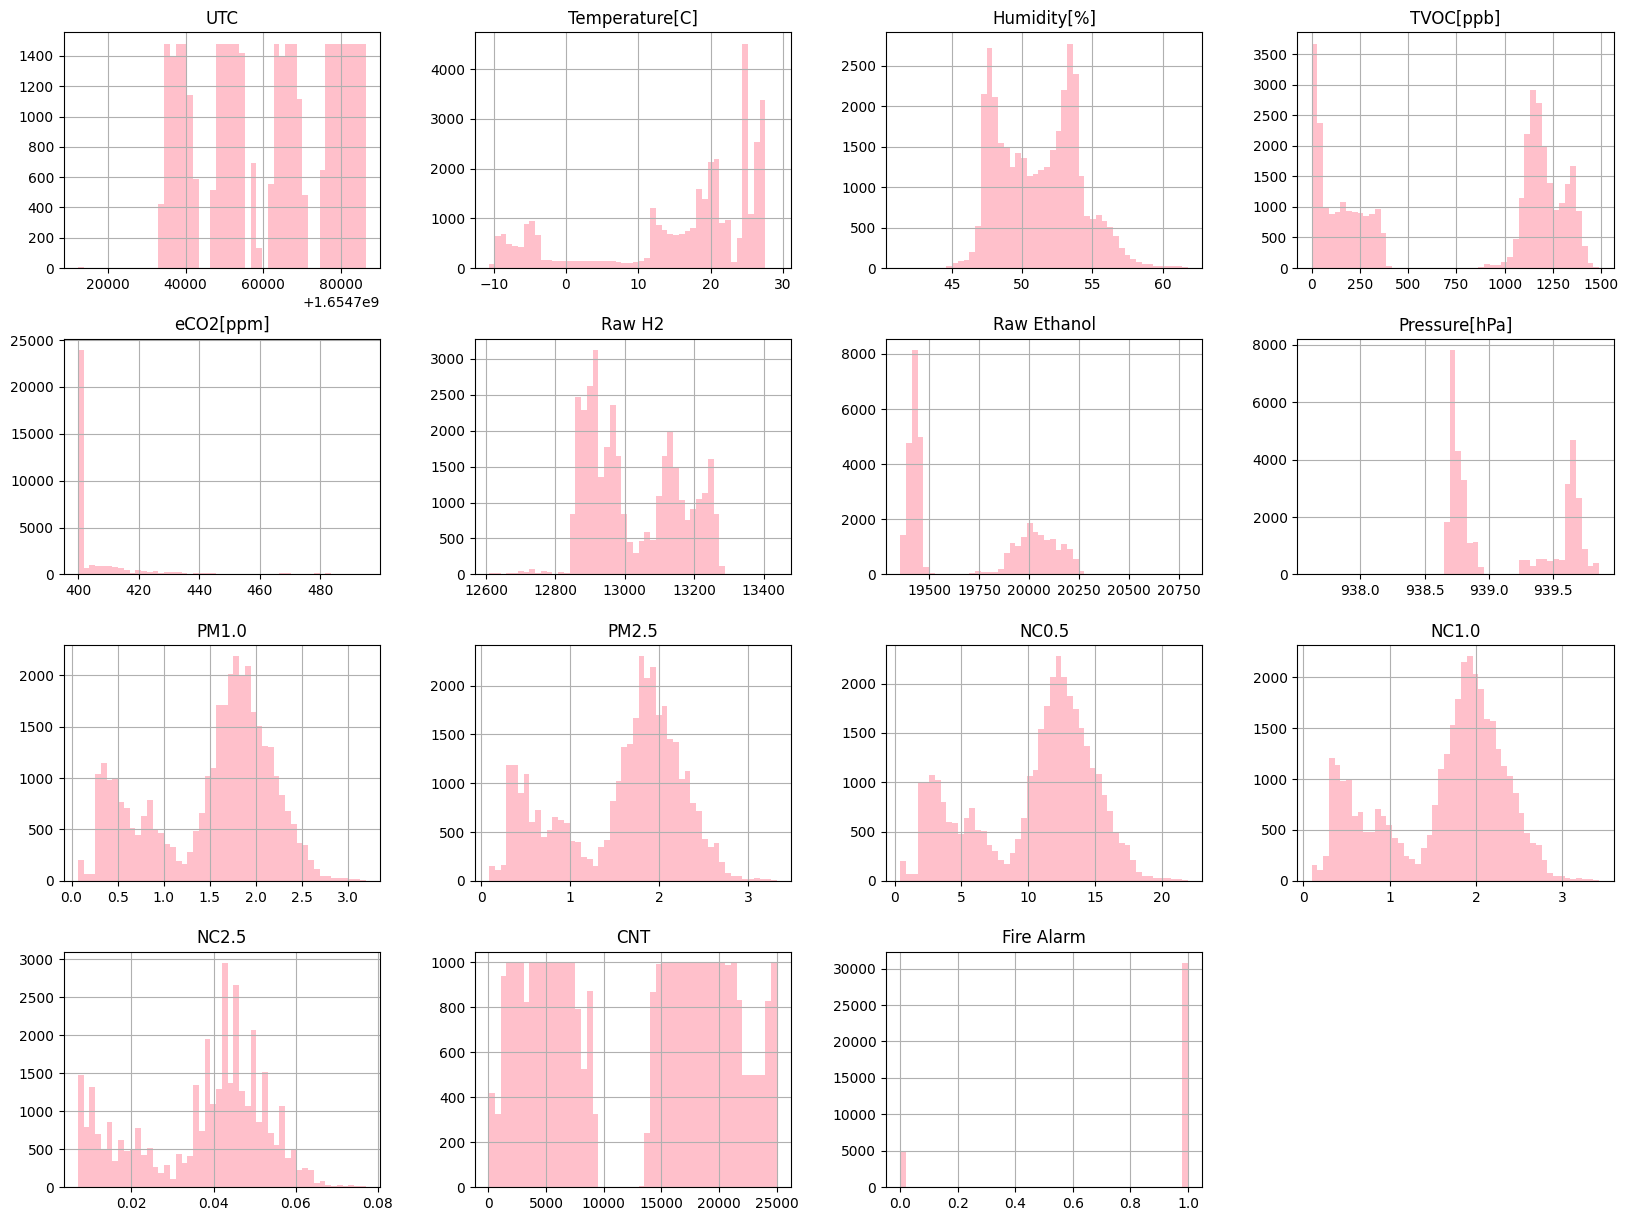

In [11]:
sp.hist(bins=50, figsize=(20,15), color='pink')
plt.show()


**5. EDA-Multivariate Analysis**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

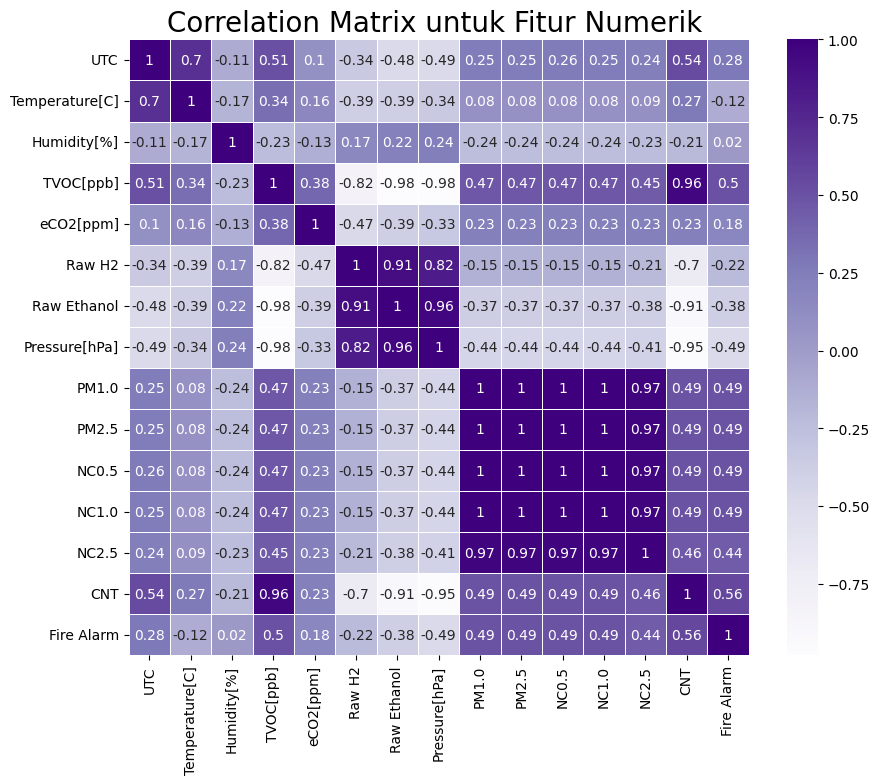

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = sp.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='Purples', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari visualisasi di atas ada beberapa kesimpulan


*   variabel CNT memiliki korelasi yang paling tinggi dengan Fire Alarm, namun sayangnya data yang dimiliki tidak berpengaruh pada Fire alarm karena hanya merupakan data Simple count


*   variabel TVOC[ppb] memiliki korelasi yang paling tinggi dengan variabele fire alarm



*   variabel Temperature, humidity, eCO2 memiliki korelasi yang sangat rendah dengan data target kita, sehingga kita bisa mengabaikan variabel ini dengan cara mendropnya



In [13]:
# drop variabel-variabel yang berkorelasi rendah dengan 'Fire Alarm'
sp.drop(['UTC', 'CNT', 'Humidity[%]', 'Temperature[C]', 'eCO2[ppm]'], inplace=True, axis=1)
sp.head()

<ipython-input-13-8a999ab23c94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp.drop(['UTC', 'CNT', 'Humidity[%]', 'Temperature[C]', 'eCO2[ppm]'], inplace=True, axis=1)


,TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
240,1,12626,19698,939.810,0.08,0.14,0.43,0.156,0.056,0
247,5,12633,19696,939.813,0.09,0.17,0.46,0.189,0.074,0
248,0,12629,19704,939.790,0.10,0.17,0.49,0.189,0.072,0
249,12,12630,19698,939.791,0.10,0.18,0.50,0.195,0.074,0
250,11,12637,19710,939.812,0.10,0.17,0.49,0.192,0.073,0


# Data Preparation

**6. Train-Test-Split**

Membagi data menjadi data train dan data set dengan data test sebesar 20%

In [15]:
from sklearn.model_selection import train_test_split
 
X = sp.drop(["Fire Alarm"],axis =1)
y = sp["Fire Alarm"]

Menangani Imbalance data agar tidak menimbukan bias

In [18]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1)
X_res, y_res =nm.fit_resample(X,y)

In [19]:
X_res.shape, y_res.shape

((9774, 9), (9774,))

Jumlah Data kita sudah balance, kemudian kita bagi dataset menjadi train dan test dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 123) 

mengecek jumlah sampel pada data train dan data test

In [23]:
print(f'Jumlah Seluruh Dataset: {len(X_res)}')
print(f'Jumlah data train: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah Seluruh Dataset: 9774
Jumlah data train: 7819
Jumlah data test: 1955


**7. Standarisasi **

In [24]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['TVOC[ppb]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
2821,-0.738515,-1.101853,-1.278935,1.042802,-1.337454,-1.345400,-1.338039,-1.346842,-1.492404
9405,1.755135,-0.000034,0.053210,-0.482388,-0.596948,-0.594383,-0.591071,-0.596097,-0.686003
5445,-0.613833,0.728728,1.009851,0.487012,0.570291,0.568481,0.569462,0.569904,0.496719
6995,2.534401,-0.008710,-0.787203,0.086327,0.080803,0.083954,0.084844,0.081920,0.012878
3648,-0.068347,-0.338388,-0.778263,-0.779671,-1.048782,-1.054684,-1.052005,-1.059448,-1.169844


mengecek nilai mean dan standar deviasi pada setelah proses standarisasi

In [25]:
X_train[numerical_features].describe().round(4)

,TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
count,7819.0000,7819.0000,7819.0000,7819.0000,7819.0000,7819.0000,7819.0000,7819.0000,7819.0000
mean,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-1.0814,-4.8064,-3.6929,-26.4365,-1.6387,-1.6240,-1.6459,-1.6178,-1.4924
25%,-0.8009,-0.2430,-0.5816,-0.5082,-0.8354,-0.8488,-0.8388,-0.8454,-0.8473
50%,-0.3801,0.2602,0.0711,-0.1205,-0.3961,-0.4006,-0.3943,-0.3979,-0.4172
75%,0.7265,0.6506,0.7774,0.4095,1.0221,1.0288,1.0213,1.0227,0.9806
max,2.9552,1.1712,6.4547,2.4129,2.1643,2.1674,2.1581,2.1641,2.2708


# Model Development

**8. Menggunakan Bernoulli Naive Bayes**

In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_squared_error

bnb = BernoulliNB()
bnb.fit(X_train, y_train)


BernoulliNB()

**9. SVM**

In [27]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)


SVC(random_state=42)

**10. Logistic Regressions**

In [28]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluasi Model

**11. Scalling**

In [29]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

**12. Melihat akurasi model**

In [30]:
# membuat variabel untuk menampung model
models = [
    ("bnb" , bnb),
    ("svc" , svc),
    ("LR", LR)
]

for nama_model, model in models:
    # Prediksi y_pred
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # melihat akurasi model
    print('{:s} acc score : {:.3f}'.format(nama_model, acc))

bnb acc score : 0.934
svc acc score : 0.999
LR acc score : 0.999


**13. Melihat f1 score**

In [31]:
for nama_model, model in models:
    # Prediksi y_pred
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    # melihat akurasi model
    print('{:s} f1 score : {:.3f}'.format(nama_model, f1))

bnb f1 score : 0.928
svc f1 score : 0.999
LR f1 score : 0.999


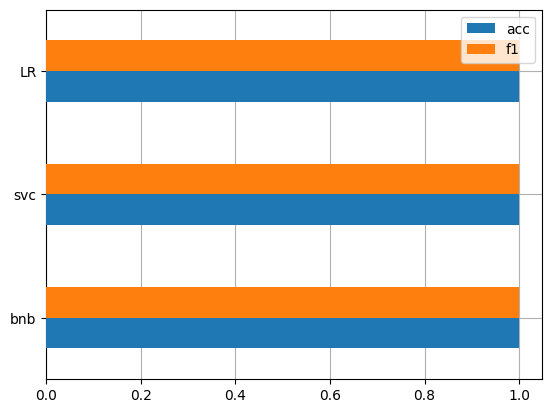

In [32]:
# Buat variabel evl 
evl = pd.DataFrame(columns=['acc', 'f1'], index=['bnb','svc','LR'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {"bnb" : bnb, "svc" : svc, "LR" : LR}
y_pred = model.predict(X_test)

for name, model in model_dict.items():
    evl.loc[name, 'acc'] = accuracy_score(y_test, y_pred)
    evl.loc[name, 'f1'] = f1_score(y_test, y_pred)
 

fig, ax = plt.subplots()
evl.sort_values(by = 'acc', ascending=False).plot(kind='barh', ax=ax, zorder=5)
ax.grid(zorder=0)

**14. Melakukan prediksi**

In [34]:
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'bnn': bnb, 'SVM': svc, 'LR': LR}

prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_bnn,prediksi_SVM,prediksi_LR
2760,0,0,0,0
